In [11]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/albumentations/check_version.py:49: UserWarning: Error fetching version info <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>
  data = fetch_version_info()


In [96]:
def get_points(image_dict):
    curr_points = []
    for i in range(len(image_dict['regions'][0]['shape_attributes']['all_points_x'])):
        curr = (image_dict['regions'][0]['shape_attributes']['all_points_x'][i], image_dict['regions'][0]['shape_attributes']['all_points_y'][i])
        curr_points.append(curr)
    return curr_points

In [99]:
def get_lists(keypoints):
    all_points_x = []
    all_points_y = []

    for x, y in keypoints:
        all_points_x.append(x)
        all_points_y.append(y)
    return all_points_x, all_points_y

In [89]:
def visualize(image, points):
    im_cp = image.copy()
    for point in points:
        cv2.circle(im_cp, (point[0],point[1]), radius=10, color=(255, 0, 0), thickness=-1)
    plt.figure(figsize=(8, 10))
    plt.axis('off')
    plt.imshow(im_cp)

In [97]:
def fix_keypoints(keypoints_):
    keypoints = []
    for point in keypoints_:
        keypoints.append((int(point[0]), int(point[1])))
    return keypoints

In [107]:
transform = A.Compose([
    A.RandomRotate90(),
    A.RandomBrightnessContrast(p=0.8)
], keypoint_params=A.KeypointParams(format='xy'))


In [108]:
import json

aug_d = {}

with open('layout.json', 'r') as f:
    d = json.load(f)
    for full_name, image_dict in d.items():
        image_path = 'images/' + image_dict["filename"]
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        keypoints = get_points(image_dict)
        transformed = transform(image=image, keypoints=keypoints)
        transformed_image = transformed['image']
        transformed_keypoints = fix_keypoints(transformed['keypoints'])
        kp_x, kp_y = get_lists(transformed_keypoints)

        aug_dict = dict(image_dict)
        aug_dict['all_points_x'] = kp_x
        aug_dict['all_points_y'] = kp_y
        
        aug_d[full_name] = aug_dict
        plt.imsave('augmented_images/' + image_dict["filename"], transformed_image)
        

In [ ]:
with open('augmented_layout.json', 'w') as f:
    json.dump(aug_d, f)

In [110]:
kp1 = points[0]
im1 = 'images/' + images[0]

In [111]:
image = cv2.imread(im1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

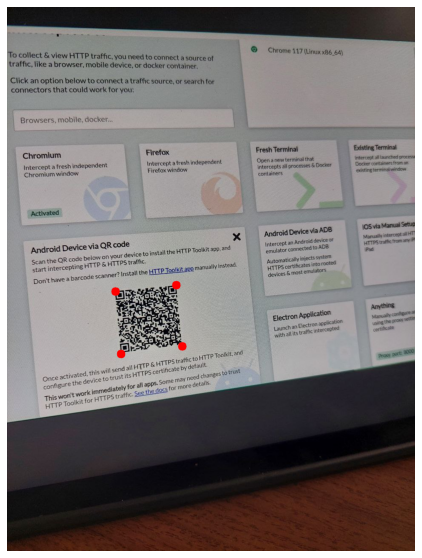

In [112]:
visualize(image, kp1)

In [63]:
transformed = transform(image=image, keypoints=kp1)
transformed_image = transformed['image']
keypoints_ = transformed['keypoints']
keypoints = []

for point in keypoints_:
    keypoints.append((int(point[0]), int(point[1])))

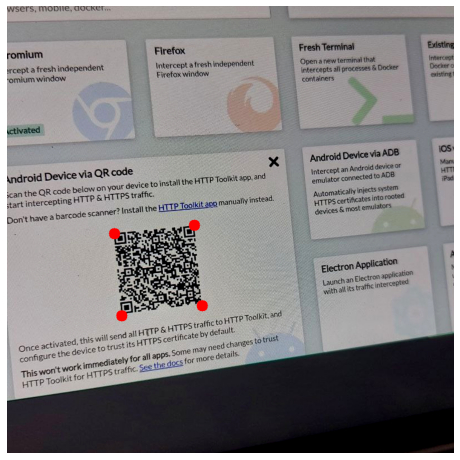

In [90]:
visualize(transformed_image, keypoints)